If you did not see still the project in file "Income", first look him at folder,"Machine-Learning-Project" and after analyse this stage.


# PROJECT - DISCOVERING THE INCOME OF A CITIZEN - CONTINUATION

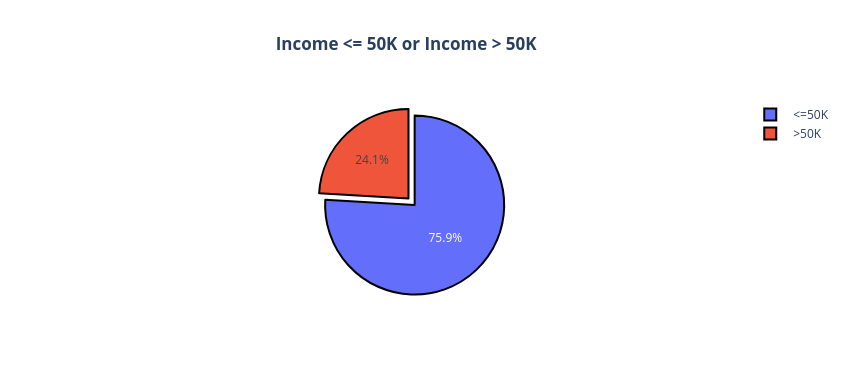

In [93]:
#Image is at folder "image"
from IPython.display import Image
Image('Class_Income.png')

**Solve imbalanced class**
24,1% of the dataset are labeled with income > 50K and 75,9% with income <= 50K by year.

In [2]:
#Importing essential libraries 
import pandas as pd
import numpy as np

In [3]:
#Load dataset getting by https://www.kaggle.com/wenruliu/adult-income-dataset
dataset=pd.read_csv('adult.data', names=["age", "workclass", "fnlwgt","education","education-num",
                                         "marital status","occupation","relationship","race","sex","capital-gain",
                                        "capital-loss","hours-per-week","native-country","income"])

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous. 

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [4]:
#Visualize some datas: 6 continuous, 8 nominal attributes. 
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Datas Analysis

In [9]:
#And education
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0# Remove features
remove_features(['education'])

0

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [11]:
#Verifying some missing values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# LABEL ENCODER

In [12]:
#To convert  categorical column in numerical by Label Encoder
from sklearn.preprocessing import LabelEncoder
Features = dataset
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [13]:
Features.head()

,age,workclass,fnlwgt,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


In [30]:
# To separate and concat the dataset
y=Features.income
X=Features.drop(['income'], axis=1)

In [31]:
X.shape

(32561, 13)

# BASELINE

**Random Forest - The best model in project Income.ipynb**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

#Predcting outcomes after tuning of Random Forest
RF = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=600)
results_1 = cross_val_predict(RF, X, y, cv=10)

In [33]:
#Presenting outcomes with confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.classification_report(y,results_1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     24720
           1       0.78      0.62      0.69      7841

    accuracy                           0.87     32561
   macro avg       0.83      0.78      0.80     32561
weighted avg       0.86      0.87      0.86     32561



**Distribuiton of the class**

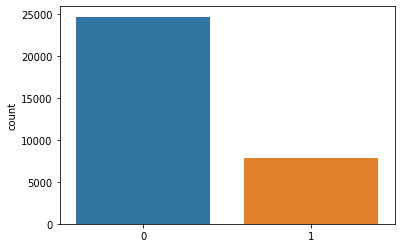

In [34]:
y=dataset['income'].values
import seaborn as sns
ax = sns.countplot(x=y)
#Class unbalanced

# Comparation among balanced undersample and oversample

**Undersample - Applying NearMiss**

In [35]:
from imblearn.under_sampling import NearMiss

In [36]:
nr = NearMiss()

In [37]:
X, y = nr.fit_sample(X, y)

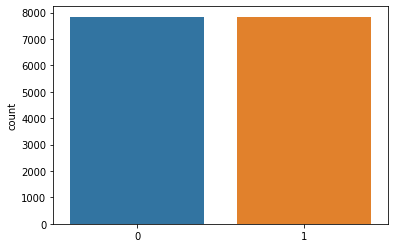

In [38]:
ax = sns.countplot(x=y)

In [39]:
#Predcting outcomes after tuning of Random Forest
RF = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=600)
results_2 = cross_val_predict(RF, X, y, cv=10)

In [40]:
print('Accuracy',metrics.accuracy_score(y,results_2))
print(metrics.classification_report(y,results_2))

Accuracy 0.8293585001913021
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7841
           1       0.82      0.84      0.83      7841

    accuracy                           0.83     15682
   macro avg       0.83      0.83      0.83     15682
weighted avg       0.83      0.83      0.83     15682



In [41]:
print (pd.crosstab(y, results_2, rownames=['Real'], colnames=['Predicted'], margins=True))
# 0: < 50k, 1: > 50k 

Predicted     0     1    All
Real                        
0          6404  1437   7841
1          1239  6602   7841
All        7643  8039  15682


Accuracy is smaller but the method hit bigger result in relation income > 50k.
The Machine Learning method got it right 6404 and it was wrong 1437 incomes <= 50K,
besides that it got it right 6602 and it was wrong 1239 incomes > 50K.

**Oversample - Applying SMOTE (Synthetic Minority Over-sampling Technique)**

In [57]:
#  Separating again the features and classes
y=Features.income
X=Features.drop(['income'], axis=1)

In [58]:
# Viewing amount of dataset by class
np.bincount(y)

array([24720,  7841])

In [59]:
# sampling_strategy=0.5
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [60]:
X, y = smt.fit_sample(X, y)

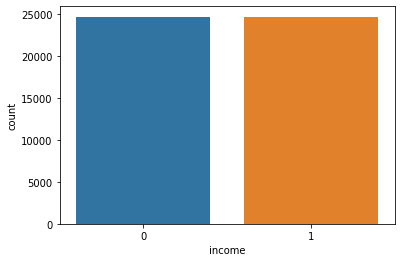

In [61]:
ax = sns.countplot(x=y)

In [62]:
#Predcting outcomes after tuning of Random Forest
RF = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=600)
results_3 = cross_val_predict(RF, X, y, cv=10)

In [63]:
print('Accuracy',metrics.accuracy_score(y,results_3))
print(metrics.classification_report(y,results_3))

Accuracy 0.8791666666666667
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     24720
           1       0.87      0.89      0.88     24720

    accuracy                           0.88     49440
   macro avg       0.88      0.88      0.88     49440
weighted avg       0.88      0.88      0.88     49440



In [65]:
print (pd.crosstab(y, results_3, rownames=['Real'], colnames=['Predicted'], margins=True))
# 0: < 50k, 1: > 50k 

Predicted      0      1    All
Real                          
0          21473   3247  24720
1           2727  21993  24720
All        24200  25240  49440


The best result so far, improve accuracy and it hit bigger result in relation income > 50k.

The Machine Learning method/SMOOT with synthetic dataset got it right 21473 and it was wrong 3247 incomes <= 50K,
besides that it got it right 21993 and it was wrong 2727 incomes > 50K.

Normalized confusion matrix
[[0.87 0.13]
 [0.11 0.89]]
TN: 21473  FP: 3247  FN: 2727  TN: 21993  FNR= 0.11268595041322314  FPR= 0.12864500792393027
Accuracy Rate: 0.8791666666666667


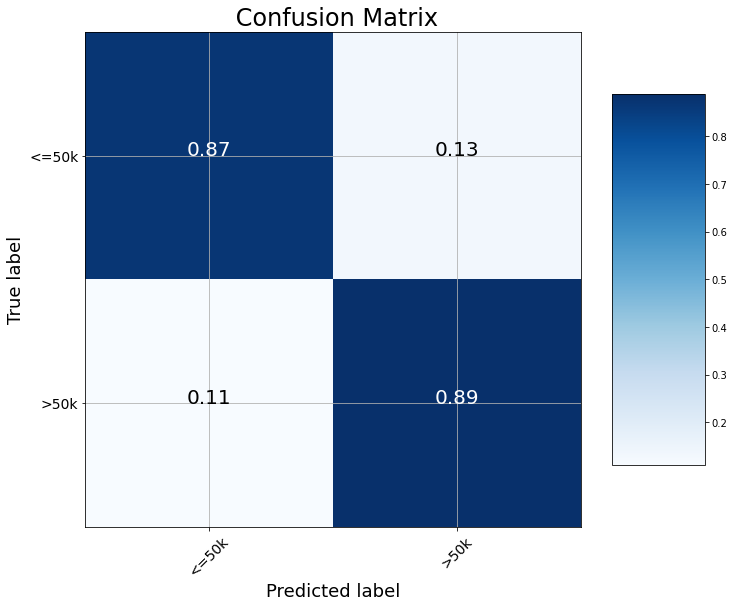

In [88]:
# TO PRINT FINAL RESULTS
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y, results_3)
plot_confusion_matrix(cm, classes = ['<=50k', '>50k'],
                      title = ' Confusion Matrix')

plt.savefig('cm.png')


#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Print out confusion matrix
cmat = confusion_matrix(y, results_3)
print("TN:", format(cmat[0,0])," FP:", format(cmat[0,1]),  " FN:", format(cmat[1,0]), " TN:", format(cmat[1,1]), 
          " FNR=", format(cmat[1,0]/(cmat[1,0]+cmat[0,0])),  " FPR=", format(cmat[0,1]/(cmat[0,1]+cmat[1,1])))

print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
#print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN: True Negative,
FP: False Positive,
FN: False Negative,
TP: True Positive,
FNR: False Negative Recall ,
FPR: False Positive Recall.

# With banced class we get best outcome so far.